<a href="https://colab.research.google.com/github/vijay313v/Bike_Sharing/blob/main/Bike_Sharing_Demand_Prediction_project_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Seoul Bike Sharing Demand Prediction**

# **Problem Description :**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **Data Description**
**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

 **Attribute Information:**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [166]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [167]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **EDA**

In [168]:
#Load dataset & top 5 observations
bike_df=pd.read_csv(r'/content/drive/MyDrive/SeoulBikeData.csv',encoding ='latin')
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [169]:
#dataset shape
bike_df.shape

(8760, 14)

In [170]:
# Dataset summary
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [171]:
#checking for null values
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**dataset doesnot have any null values**

In [172]:
#Creating function to return all the unique values each categorical column can have
def unique_cols(cat_cols,df):
  for col in cat_cols:
    print("The values of categorical column",col,"is:",df[col].unique())

In [173]:
categorical_columns=['Seasons','Holiday']
unique_cols(categorical_columns,bike_df)

The values of categorical column Seasons is: ['Winter' 'Spring' 'Summer' 'Autumn']
The values of categorical column Holiday is: ['No Holiday' 'Holiday']


In [174]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return bike_df.groupby(col)['Rented Bike Count'].sum().reset_index()

In [175]:
#Seasons column
seasons_col = create_df_analysis('Seasons')
seasons_col

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


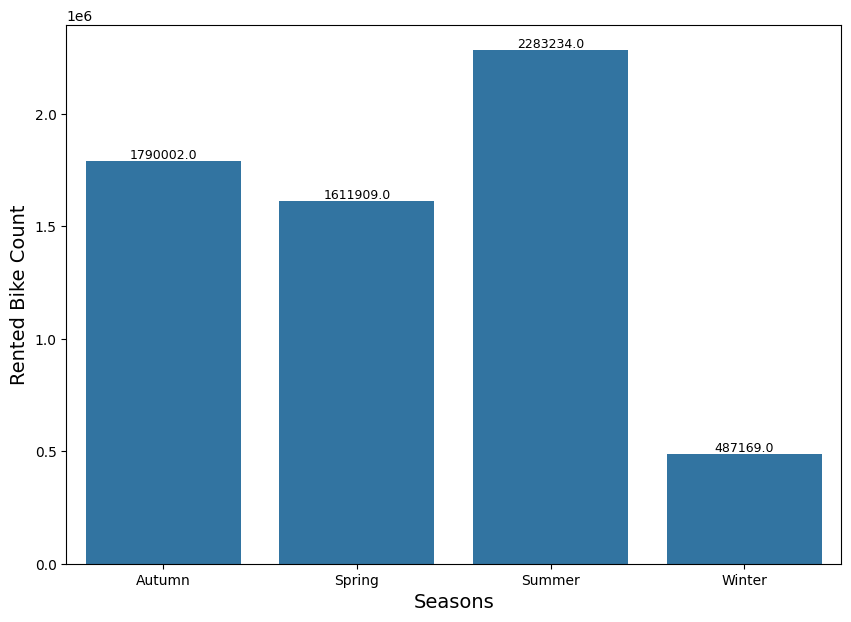

In [176]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(10, 7))
splot = sns.barplot(data=seasons_col, x='Seasons', y='Rented Bike Count')
for bar in splot.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),  # Y-coordinate
        f'{bar.get_height():.1f}',  # Text label
        ha='center', va='bottom',  # Alignment
        fontsize=9,  # Font size
        color='black'  # Text color
    )

plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [177]:
#plotting pie chart with percentages
seasons_list = list(seasons_col['Seasons'])
rented_count_list = list(seasons_col['Rented Bike Count'])


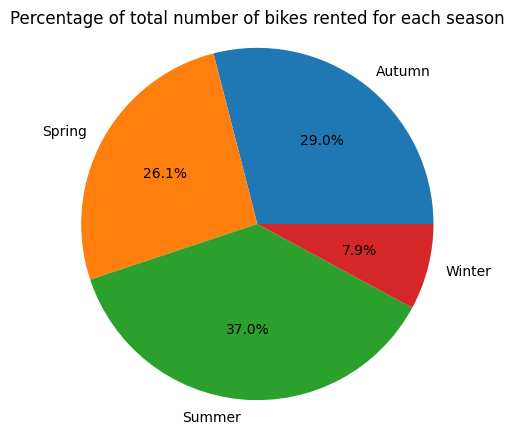

In [178]:
#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels=seasons_list,autopct='%1.1f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")
plt.show()

**As we can see that summer has the highest number of bikes rented, almost 37%. Winter however is the season where the least number of bikes are rented around 8%**

In [179]:
holidays_col = create_df_analysis('Holiday')
holidays_col

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


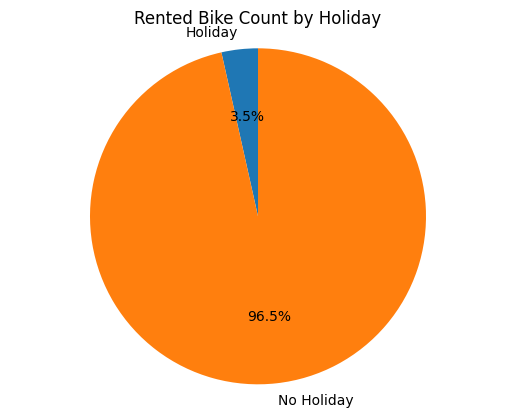

In [180]:
# Group by 'Holiday' and plot a pie chart with counts on the slices
grouped_data = bike_df.groupby('Holiday').sum()
grouped_data['Rented Bike Count'].plot.pie(radius=1, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Rented Bike Count by Holiday')


plt.ylabel('')
plt.show()

***majority of the bikes rented are on days which are considered as No Holiday.***

In [181]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
temp = create_df_analysis('Temperature(°C)')
temp

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


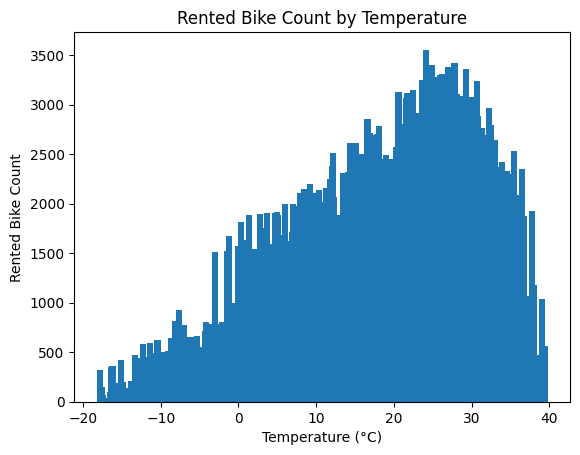

In [182]:
plt.bar(bike_df['Temperature(°C)'], bike_df['Rented Bike Count'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Temperature')
plt.show()


As we can see that the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.

In [183]:
#Creating a dataframe for analysing the number of bikes rented for different humidity percentages.
humidity_bike = create_df_analysis('Humidity(%)')
humidity_bike

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


majority of the bikes are rented for a humidity percentage range of 30 to 70.

[Text(0.5, 1.0, 'Count of Rented bikes  ')]

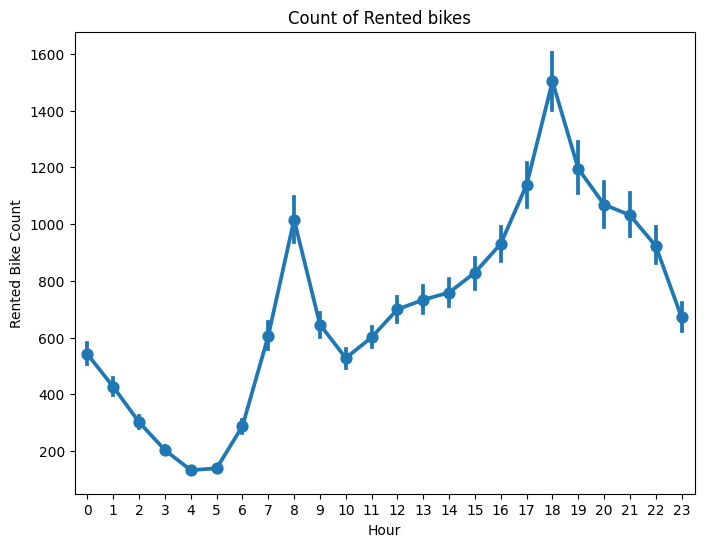

In [184]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes  ')

Here we can see that the highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.

In [185]:
#Holidays column
holidays_col = create_df_analysis('Holiday')
holidays_col

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


Text(0, 0.5, 'Rented Bike Count')

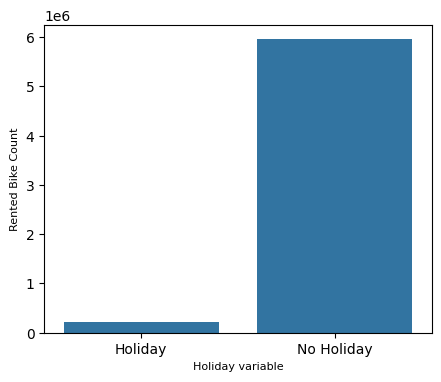

In [186]:
#visualisation for the holidays dataframe
plt.figure(figsize=(5,4))
splot = sns.barplot(data=holidays_col,x='Holiday',y='Rented Bike Count')

plt.xlabel("Holiday variable",size=8)
plt.ylabel("Rented Bike Count", size=8)

mojority people rented bikes when there is no Holiday

In [187]:
#Functionoing column
func_col = create_df_analysis('Functioning Day')
func_col

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


people do not use rented bike on no functioning day

**Removing Outliers**

In [188]:
#Creating a list of columns that can possibly contain outliers
outlier_cols = list(set(bike_df.describe().columns)-{'Rented Bike Count','Hour'})
outlier_cols


['Visibility (10m)',
 'Temperature(°C)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Humidity(%)',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'Dew point temperature(°C)']

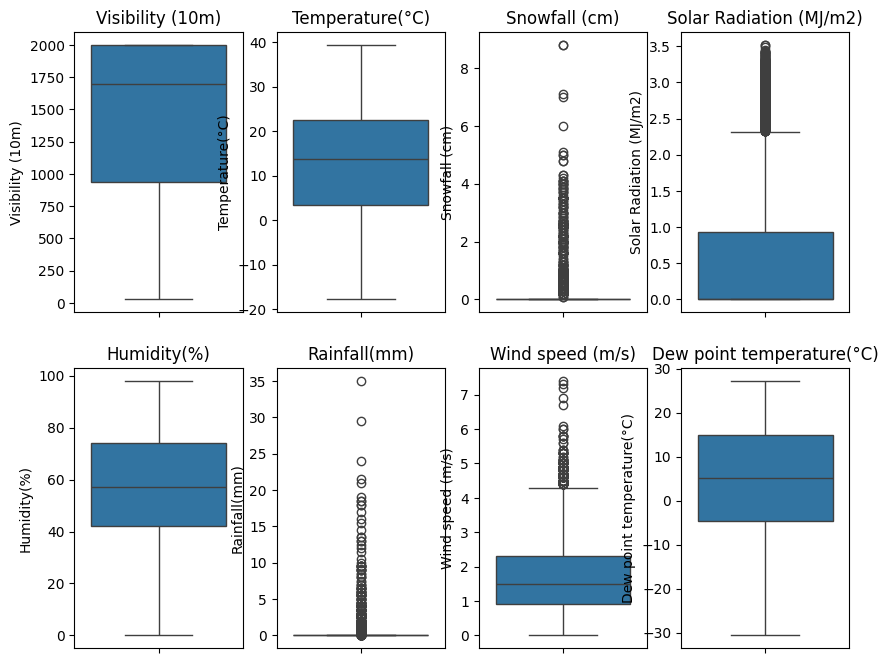

In [189]:
# with the use of Boxplot detecting outlier columns
plt.figure(figsize=(10,8))
for index ,item in enumerate (outlier_cols):
  plt.subplot(2,4, index+1)
  sns.boxplot(bike_df[item])
  plt.title(item)

Columns snowfall, windspeed ,rainfall, solar radiation has outliers

In [190]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bike_df[outlier_cols].quantile(0.25)
Q3 = bike_df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Visibility (10m)             1060.00
Temperature(°C)                19.00
Snowfall (cm)                   0.00
Solar Radiation (MJ/m2)         0.93
Humidity(%)                    32.00
Rainfall(mm)                    0.00
Wind speed (m/s)                1.40
Dew point temperature(°C)      19.50
dtype: float64

In [191]:
# calculating upper and lower fence
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)

In [192]:
bike_df[outlier_cols]=bike_df[outlier_cols][~((bike_df[outlier_cols] < lower_fence) | (bike_df[outlier_cols] > upper_fence))]

In [193]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Due to outlier deletion there is some null values created in 4 columns ,now either remove null value observation or replace it with meaning values.Here I will replace it with median

chosen median value over mean value -- because Mean is sensitive to extreme values (outliers) and tends to be effected by that, where as median is not

In [194]:
def replace_null(psbl_outliers_cols):
  for col in outlier_cols :
    bike_df[col].fillna(bike_df[col].median(),inplace=True)

In [195]:
replace_null(outlier_cols)

In [196]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

All null values are replaced with median value

# **Feature Engineering**
**feature encoding**

Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as Feature Encoding

Here we have three columns that require encoding and they are Seasons, Holiday and Functioning Day.

In [197]:
#Encoding for Seasons column
bike_df['Winter'] = np.where(bike_df['Seasons']=='Winter', 1, 0)
bike_df['Spring'] = np.where(bike_df['Seasons']=='Spring', 1, 0)
bike_df['Summer'] = np.where(bike_df['Seasons']=='Summer', 1, 0)
bike_df['Autumn'] = np.where(bike_df['Seasons']=='Autumn', 1, 0)

#Removing seasons column since we dont require it now.
bike_df.drop(columns=['Seasons'],axis=1,inplace=True)

In [198]:
#Encoding for Holiday column
bike_df['Holiday'] = np.where(bike_df['Holiday']=='Holiday',1,0)

In [199]:
#Encoding for Functioning day
bike_df['Functioning Day'] = np.where(bike_df['Functioning Day']=='Yes',1,0)

In [200]:
#Look of the dataframe after encoding all three columns
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


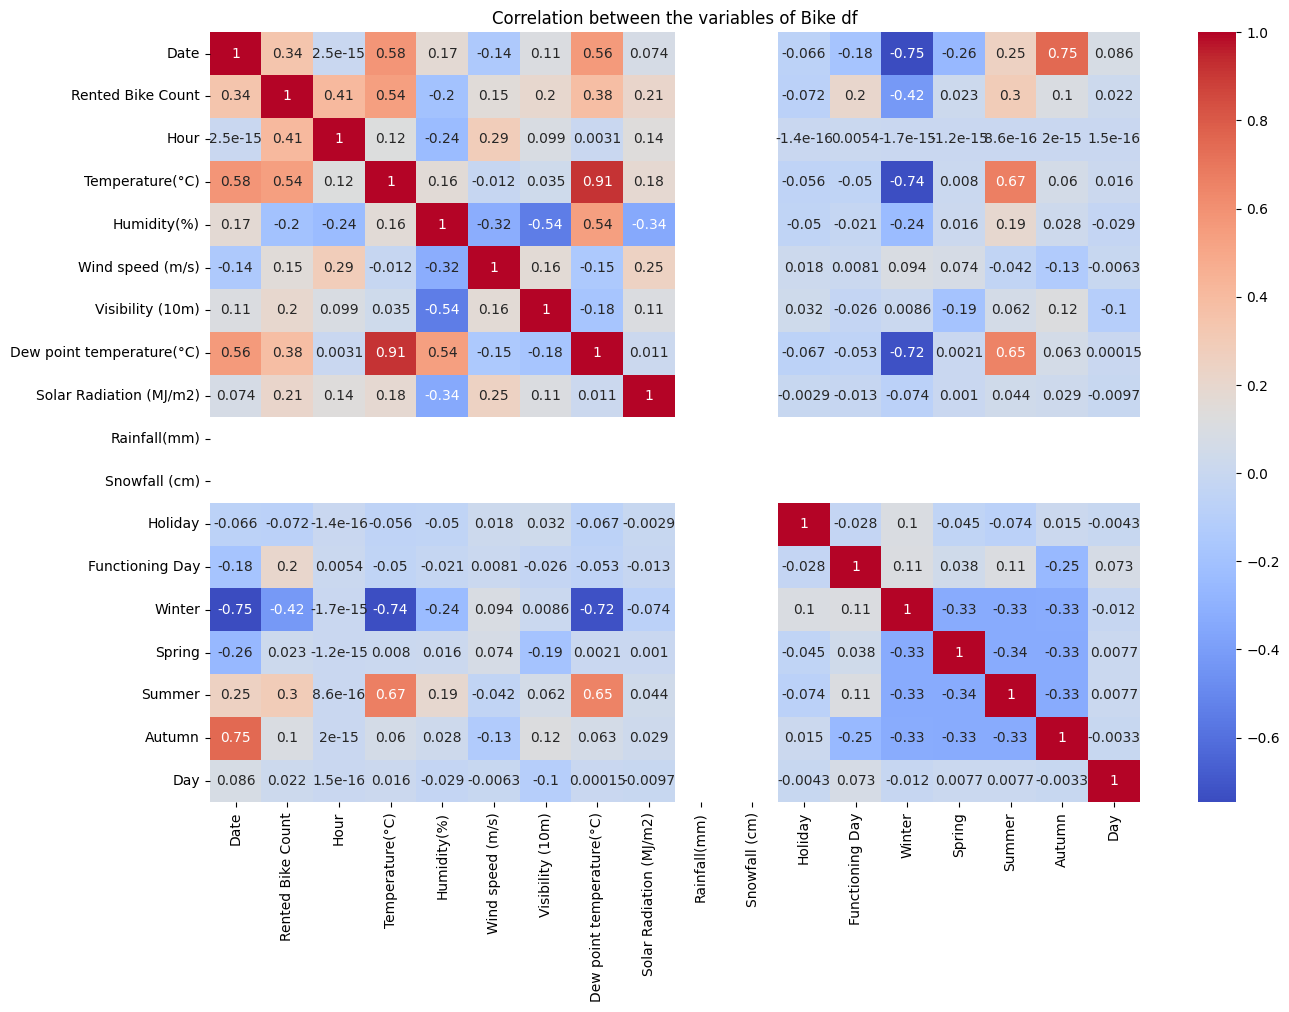

In [201]:
# Convert the 'Date' column to datetime objects with dayfirst=True
bike_df['Date'] = pd.to_datetime(bike_df['Date'], dayfirst=True)

# Extract numerical features from the 'Date' column if needed for correlation analysis.
# For example, to extract the day of the month:
bike_df['Day'] = bike_df['Date'].dt.day

# Now calculate the correlation matrix
corr_matrix = bike_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between the variables of Bike df')
plt.show()


The Dew point temperature column is highly correlated to the Temperature column and therefore we can remove it and it most likely won't affect our model building much, so we will drop the dew point temperature column.

I will also remove the date column because I don't think it adds any value.

In [202]:
#Dropping unnecessary columns
bike_df.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)

In [203]:
bike_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Winter',
       'Spring', 'Summer', 'Autumn', 'Day'],
      dtype='object')

## **Removing Multicollinearity:**

In [204]:
#Creating a list of independent columns
indv_cols = list(set(bike_df.columns)-{'Rented Bike Count'})

In [205]:
#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [206]:
#Calculating the VIF for independent columns
calc_vif(bike_df[indv_cols])

,Columns,VIF
0,Functioning Day,1.085226
1,Summer,32.907377
2,Autumn,25.220257
3,Humidity(%),2.074285
4,Winter,22.206900
5,Rainfall(mm),NaN
6,Visibility (10m),1.669265
7,Holiday,1.022256
8,Temperature(°C),4.444145
9,Day,1.032883


We can see that the seasons encoding have very high VIF therefore we will eliminate one of the columns. We will drop winter because it has the lowest bikes rented. The columns Rainfall and Snowfall have no VIF at all so we will drop them too.

In [207]:
#Dropping the Unnecessary columns
bike_df.drop(columns={'Winter','Rainfall(mm)','Snowfall (cm)'},axis=1,inplace=True)

In [208]:
#Creating a list of remaining independent columns
indv_cols = list(set(bike_df.columns)-{'Rented Bike Count'})

In [209]:
#Calculating VIF for remaining independent columns
calc_vif(bike_df[indv_cols])

,Columns,VIF
0,Functioning Day,20.528625
1,Visibility (10m),7.347879
2,Holiday,1.071639
3,Summer,9.202435
4,Temperature(°C),9.607708
5,Day,4.068036
6,Autumn,4.466428
7,Humidity(%),10.498034
8,Solar Radiation (MJ/m2),1.652782
9,Spring,3.980807


We can see that Functioning Day has a VIF>10 therefore we will remove it.

In [210]:
#Dropping the Functioning Day column
bike_df.drop(columns={'Functioning Day'},axis=1,inplace=True)

In [211]:
#Creating a list with remaining independent columns
indv_cols = list(set(bike_df.columns)-{'Rented Bike Count'})

In [212]:
#Calculating the VIF for remaining independent columns
calc_vif(bike_df[indv_cols])

,Columns,VIF
0,Visibility (10m),5.358607
1,Holiday,1.071304
2,Summer,9.177790
3,Temperature(°C),9.490843
4,Day,3.732086
5,Autumn,4.447008
6,Humidity(%),6.086221
7,Solar Radiation (MJ/m2),1.603774
8,Spring,3.944483
9,Wind speed (m/s),4.756661


**Now that we don't have any variable with VIF>10 we can move ahead.**

## **Correlation between Independent and Dependent variables :**

# **Regression plot**


We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

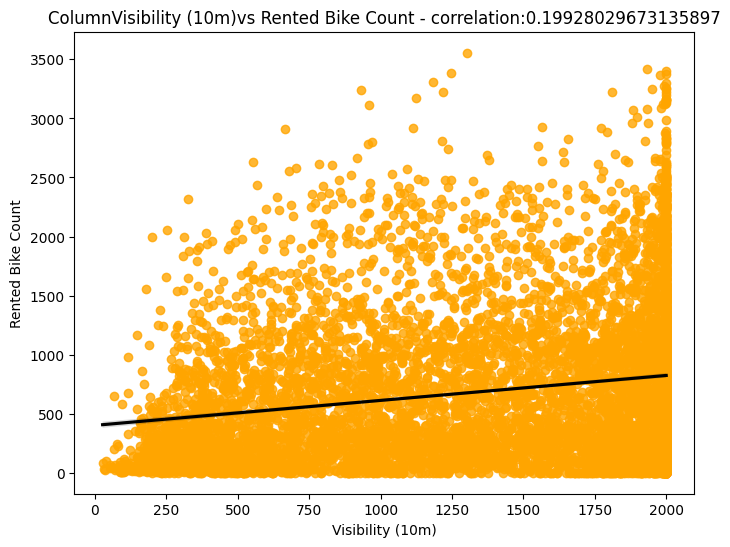

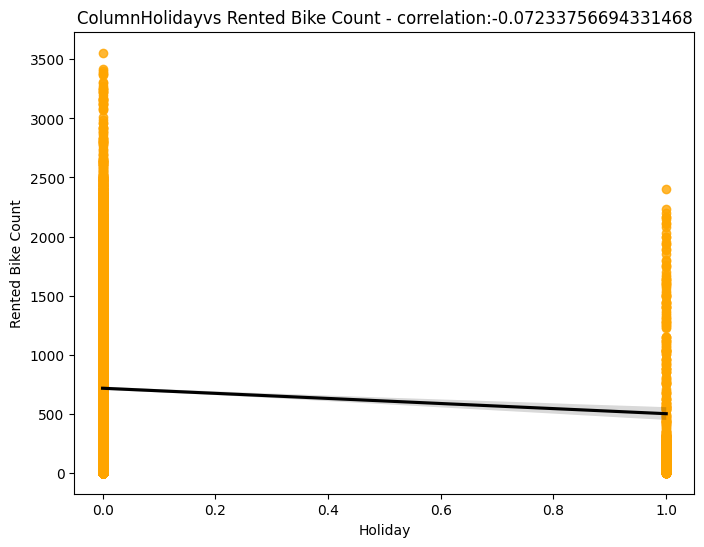

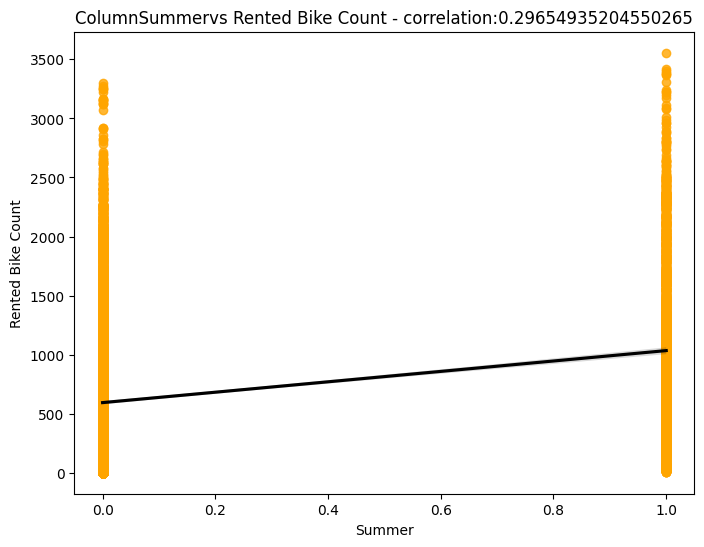

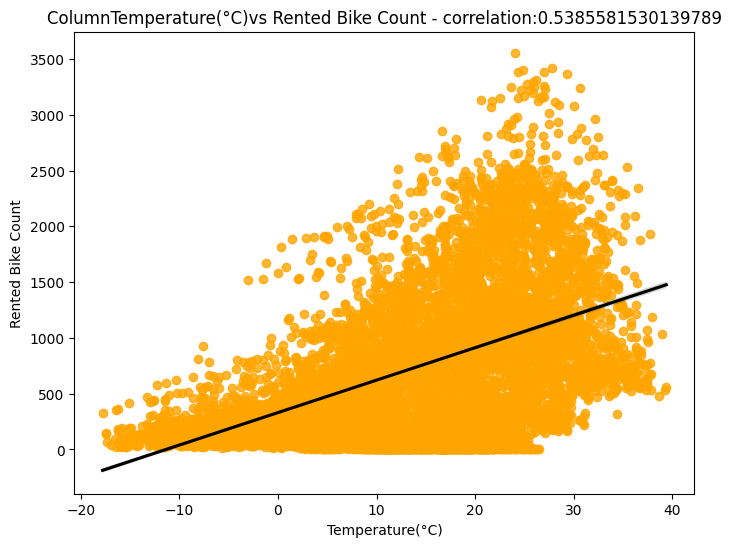

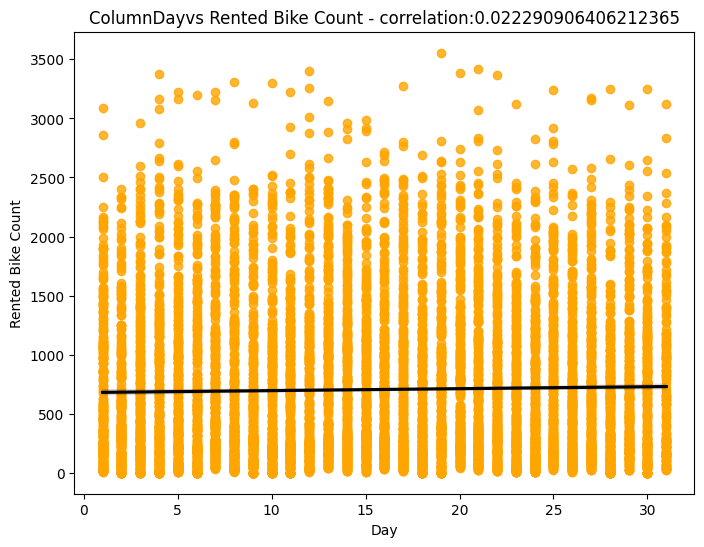

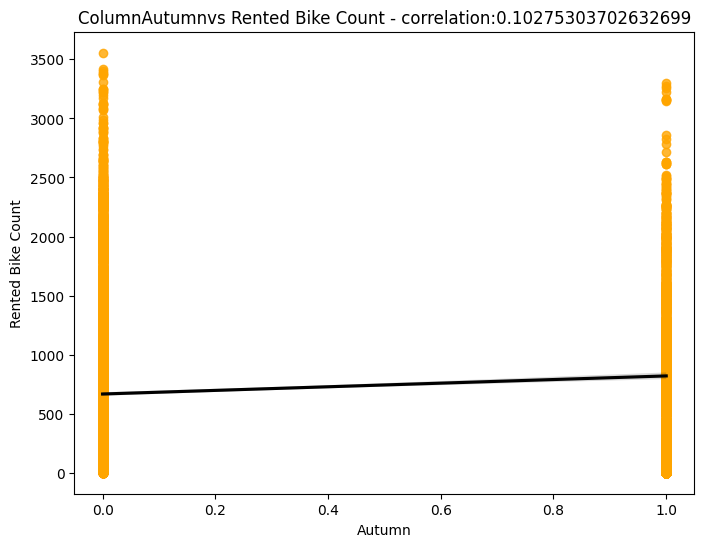

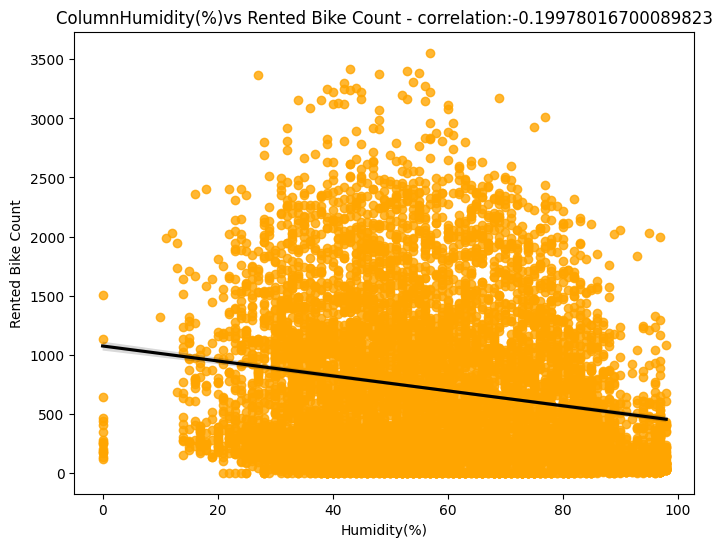

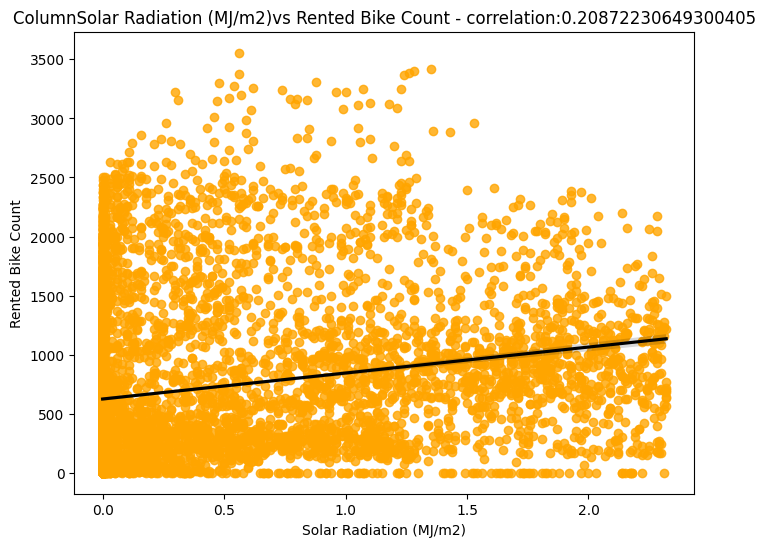

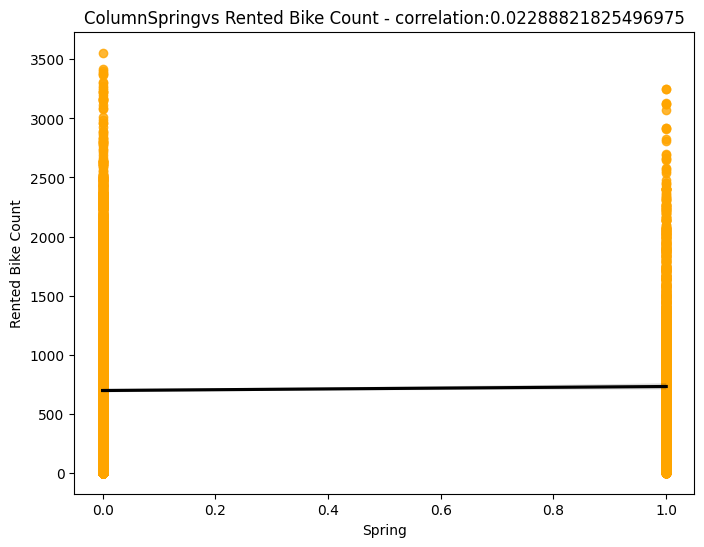

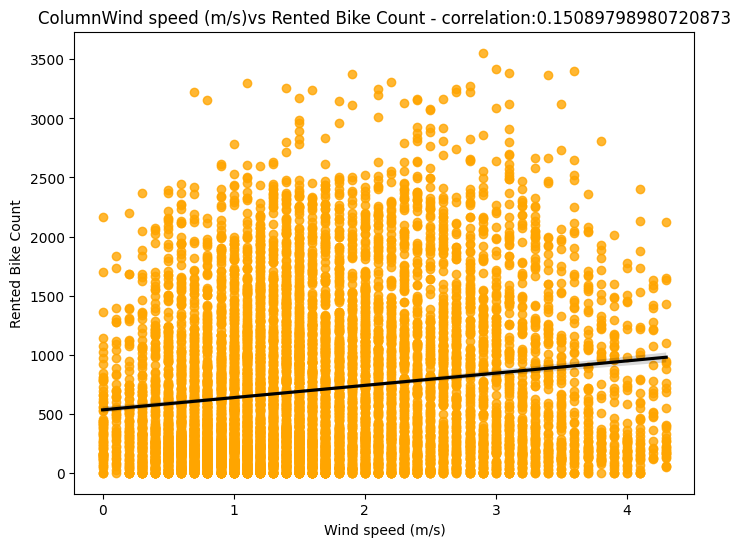

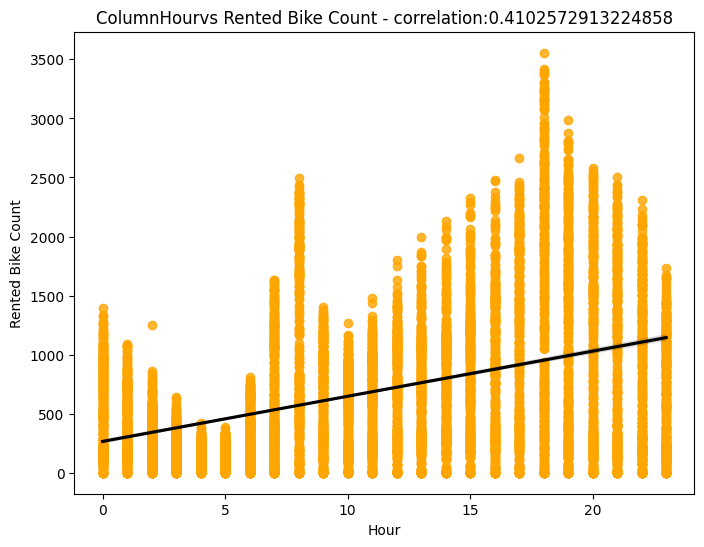

In [213]:
#printing the regression plot for all the numerical features
for col in indv_cols:
  fig,ax=plt.subplots(figsize=(8,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})
  corr=bike_df[col].corr(bike_df['Rented Bike Count'])
  ax.set_title('Column'+ col+'vs Rented Bike Count - correlation:'+str(corr))

all the remaining columns that we have is having linear relationship with the dependent variable. So we have satisfied the assumption

# **Data preprocessing**

In [214]:
#Assign the value in X and Y
X = bike_df.drop(columns=['Rented Bike Count'], axis=1)
y =np.sqrt(bike_df['Rented Bike Count'])

In [215]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Spring,Summer,Autumn,Day
0,0,-5.2,37,2.2,2000,0.0,0,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0,0,0,0,1


In [216]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

performed square root transformation in distribution of the target feature is observed positively skewed distribution it is normalised using square root transformation.

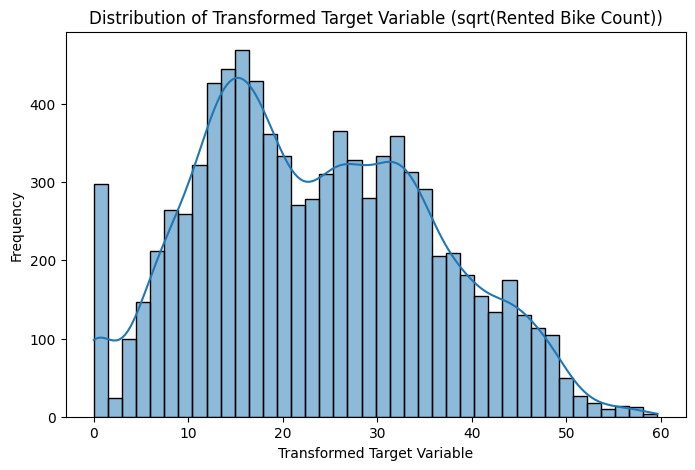

In [217]:
# Plot a histogram of the transformed target variable 'y'
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=40, kde=True)
plt.title('Distribution of Transformed Target Variable (sqrt(Rented Bike Count))')
plt.xlabel('Transformed Target Variable')
plt.ylabel('Frequency')
plt.show()


**target variable is normalised**

## **Creating the test and train data**

In [218]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 11)
(2190, 11)


## **Feature Scaling :**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.It is performed during the data preprocessing to handle highly varying magnitudes or values or units .

Two ways of feature scaling:
 1. Min max normalization
 2. Standardisation

 here , i am going to use standardization method with the help of StandardScaler() function

In [219]:
# standardizing the independent variables
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [220]:
# overview of data after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.57582707,
         1.72819284,  1.05416844],
       [ 0.36544652,  0.93615918, -0.54181953, ..., -0.57582707,
        -0.57863913,  1.62176172],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.57582707,
        -0.57863913,  1.28120575],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ...,  1.73663249,
        -0.57863913,  0.60009382],
       [-1.66021162, -0.37401835,  0.04777967, ..., -0.57582707,
        -0.57863913,  0.03250055],
       [ 1.23358573, -0.47415931,  1.22697808, ..., -0.57582707,
        -0.57863913,  0.94064979]])

# **Model Implementation:**

Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with a regression problem, therefore we will be using regression models. Some popular examples are Linear Regression and polynomial regression.

In this project we will be include the following models:

1.Linear regression

2.Ridge regression (Linear regression with L2 regularization)

3.Lasso regression (Linear regression with L1 regularization)

4.ElasticNet

5.Random forest regression

**Linear Regression Model**

As stated earlier linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

In [221]:
#Training the linear regression model
lr_model = LinearRegression().fit(X_train,y_train)

In [222]:
#Checking the score of the linear regression model
lr_model.score(X_train,y_train)

0.483903697136674

In [223]:
#Checking the coefficient values of the linear regression model
lr_model.coef_

array([ 3.50005442e+00,  4.43146014e+00, -3.17494328e+00,  2.87753986e-04,
        2.93988429e-01,  1.84124931e-01, -7.87166121e-01,  2.44482959e+00,
        3.12782533e+00,  2.69998885e+00,  4.20109870e-01])

In [224]:
#Predicting the value of the dependent variable for train and test dataset
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

In [225]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2_test = r2_score(y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)

  a_r2_test = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [226]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 86.53293799048768
RMSE : 9.302308207670164
R2 : 0.4522066961195791
Adjusted R2 : 0.44944006327169816


**Ridge Regression**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [227]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [0.1,0.001,10,20,30,35,40,60,70,100]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train,y_train)

print(ridge_model_grid.best_params_)
print(ridge_model_grid.best_score_)

{'alpha': 35}
-79.8751849251833


In [228]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=30).fit(X_train,y_train)

In [229]:
#Predicting values of the independent variable on the test set
y_test_pred_ridge = ridge_model.predict(X_test)

In [230]:
#Calculating the evaluation metrics for Ridge Regression
eval_metrics(y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 86.53032790060321
RMSE : 9.302167914018925
R2 : 0.4522232191892268
Adjusted R2 : 0.4494566697911927


**Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [231]:
#Creating a Lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.5,1,10,20,40,80,100,300,400,500]}
lasso_model_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train, y_train)

print(lasso_model_grid.best_params_)
print(lasso_model_grid.best_score_)

{'alpha': 0.5}
-83.10913912818714


In [232]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=0.5).fit(X_train,y_train)

In [233]:
#Predicting values of the independent variable on the test set
y_test_pred_lasso = lasso_model.predict(X_test)

In [234]:
#Calculating the evaluation metrics for Lasso Regression
eval_metrics(y_test_pred_lasso,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 89.03139409811101
RMSE : 9.435644869223884
R2 : 0.4363903196324471
Adjusted R2 : 0.43354380609523735


**model quality is depreciated by using lasso regression**

# **Elastic Net**

Elastic Net Regression combines the features of both Lasso and Ridge Regression It is a regularized regression technique that is used to deal with the problems of multicollinearity and overfitting

In [235]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [236]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

#check the score
elasticnet.score(X_train, y_train)


0.4815022544140687

In [237]:

#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [238]:

#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 79.84381979843015
RMSE : 8.93553690599676
R2 : 0.4815022544140687
Adjusted R2 : 0.4788835789313115


# **Random Forest Regression:**

Random forest is an ensemble of decision trees. This is to say that many trees, constructed in a certain “random” way form a Random Forest.

Each tree is created from a different sample of rows and at each node, a different sample of features is selected for splitting.
Each of the trees makes its own individual prediction.
These predictions are then averaged to produce a single result.
The averaging makes a Random Forest better than a single Decision Tree hence improves its accuracy and reduces overfitting.

A prediction from the Random Forest Regressor is an average of the predictions produced by the trees in the forest.

In [239]:
# Create a Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=5)

# Training the model
rf_reg.fit(X_train, y_train)

# Predictions on the training and test data
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

# Evaluate the model on the training data
MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_Score_train = r2_score(y_train, pred_train)

# Print training metrics
print(f'Training MSE: {MSE_train}')
print(f'Training RMSE: {RMSE_train}')
print(f'Training R2 Score: {R2_Score_train}')

# Evaluate the model on the test data
MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_Score_test = r2_score(y_test, pred_test)

# Print test metrics
print(f'Test MSE: {MSE_test}')
print(f'Test RMSE: {RMSE_test}')
print(f'Test R2 Score: {R2_Score_test}')


Training MSE: 4.5989543436494795
Training RMSE: 2.1445172752042545
Training R2 Score: 0.9701348524500106
Test MSE: 39.56341561794998
Test RMSE: 6.28994559737602
Test R2 Score: 0.7495453793960691


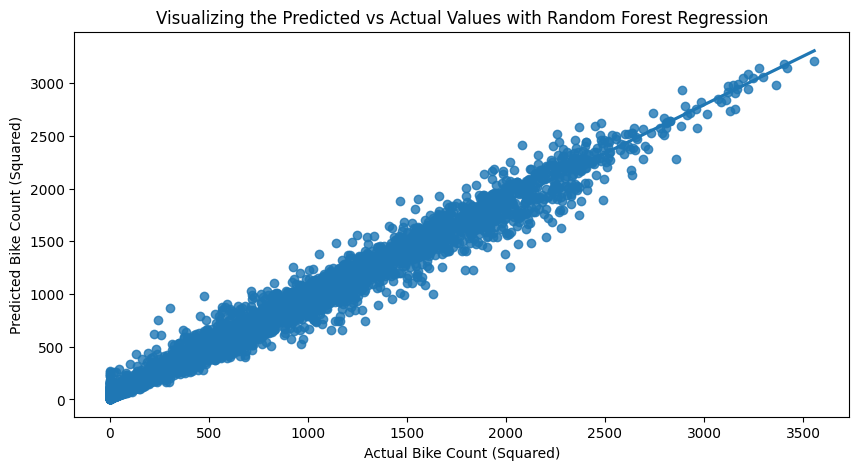

In [240]:
# Calculate squared values for better visualization
y_train_squared = y_train ** 2
pred_train_squared = pred_train ** 2

# Plotting the outputs for the training data
plt.figure(figsize=(10, 5))
sns.regplot(x=y_train_squared, y=pred_train_squared)
plt.title('Visualizing the Predicted vs Actual Values with Random Forest Regression', size=12)
plt.xlabel('Actual Bike Count (Squared)', size=10)
plt.ylabel('Predicted Bike Count (Squared)', size=10)
plt.show()

# **Conclusion :**


*   Most number of bikes are rented in the Summer season and the lowest in the winter seaso
*   We observed that the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day

*   Over 96% of the bikes are rented on days that are considered as No Holiday.
*   Majority of the bikes are rented for a humidity percentage range of 30 to 70.

*   Most number of bikes are rented in the temperature range of 15 degrees to 30 degrees.




*   Random Forest Regression is the best performing model with an r2 score of 0.6805.
*   Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4363.






